In [1]:
using PyPlot
using Statistics
using LinearAlgebra

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/cdesa/.julia/packages/PyPlot/4wzW1/src/init.jl:192


### Demonstration of the usefulness of subsampling.

Let's consider a setting in which we are using 0-1 loss for our empirical risk, and imagine that our error rate is $p = 0.3$ over the whole dataset of $n = 1000000$ examples. Without loss of generality, suppose that the first $30\%$ of the examples are errors and the remainder are not. We can construct the losses of these examples as follows.

In [2]:
n = 1000000;
p = 0.3;
L = vcat(ones(Int64(n * p)), zeros(n - Int64(n * p)));

Next, let's sample some variables $Z_k$ which are samples from the empirical risk.

In [3]:
Kmax = 100000;
Z = [rand(L) for k = 1:Kmax];

Next, we compute the partial averages
$$
    S_K = \frac{1}{K} \sum_{k=1}^K Z_k.
$$

In [4]:
S = cumsum(Z) ./ (1:Kmax);

Now we can plot this average and see how it changes as we increase $K$.

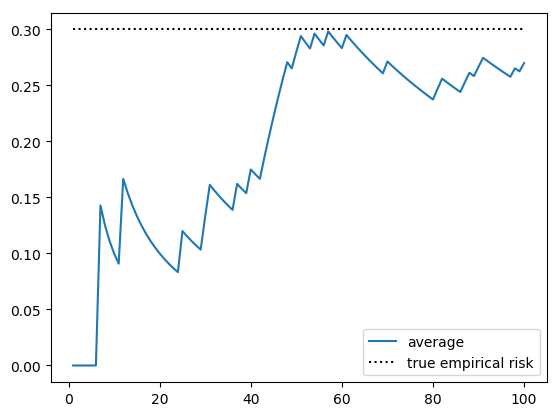

true  empirical  risk: 0.3
approx empirical risk: 0.27
error                : 0.02999999999999997


In [5]:
Kplot = 100;
plot(collect(1:Kplot), S[1:Kplot]; label="average");
plot(collect(1:Kplot), p * ones(Kplot), "k:"; label="true empirical risk");
legend();
show();

# what's the error at the end?
println("true  empirical  risk: $p");
println("approx empirical risk: $(S[Kplot])");
println("error                : $(abs(S[Kplot]-p))");

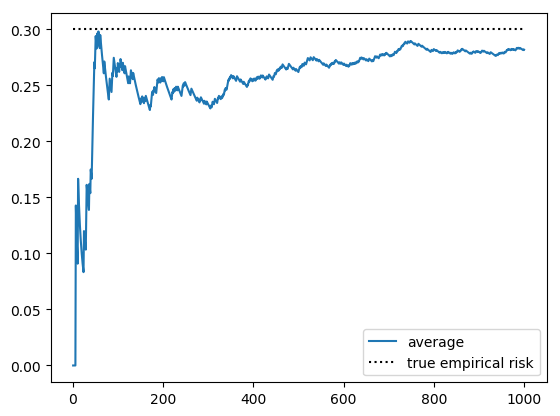

true  empirical  risk: 0.3
approx empirical risk: 0.282
error                : 0.018000000000000016


In [6]:
Kplot = 1000;
plot(collect(1:Kplot), S[1:Kplot]; label="average");
plot(collect(1:Kplot), p * ones(Kplot), "k:"; label="true empirical risk");
legend();
show();

# what's the error at the end?
println("true  empirical  risk: $p");
println("approx empirical risk: $(S[Kplot])");
println("error                : $(abs(S[Kplot]-p))");

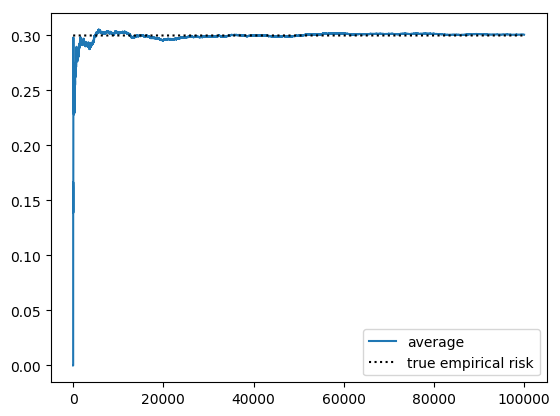

true  empirical  risk: 0.3
approx empirical risk: 0.30075
error                : 0.0007500000000000284


In [7]:
Kplot = Kmax;
plot(collect(1:Kplot), S[1:Kplot]; label="average");
plot(collect(1:Kplot), p * ones(Kplot), "k:"; label="true empirical risk");
legend();
show();

# what's the error at the end?
println("true  empirical  risk: $p");
println("approx empirical risk: $(S[Kplot])");
println("error                : $(abs(S[Kplot]-p))");

## How long does it take to do subsampling for empirical risk?

Let's choose some $x$ and $y$ completely at random, and evaluate the hypothesis
$$h_w(x) = \operatorname{sign}(x^T w).$$

In [8]:
n = 1000000;
d = 256;
Xs = [randn(d) for i=1:n];
w = randn(d);
Ys = [sign(rand([-1.0,0.9,1.0,1.1])*sign(dot(Xs[i],w))) for i=1:n];

# error should be about 25%

In [9]:
function total_error(Xs::Array{Array{Float64,1},1}, Ys::Array{Float64,1}, w::Array{Float64,1})
    n = length(Ys);
    return mean(sign(dot(Xs[i],w)) != Ys[i] for i = 1:n);
end

total_error (generic function with 1 method)

In [10]:
# warm up the compiler
total_error(Xs, Ys, w);
total_error(Xs, Ys, w);

@time total_error(Xs, Ys, w)

  0.166619 seconds (7 allocations: 240 bytes)


0.250302

In [11]:
function estimate_error(Xs::Array{Array{Float64,1},1}, Ys::Array{Float64,1}, w::Array{Float64,1}, K::Int64)
    n = length(Ys);
    return mean(sign(dot(Xs[i],w)) != Ys[i] for i = rand(1:n, K));
end

estimate_error (generic function with 1 method)

In [22]:
# warm up the compiler
estimate_error(Xs, Ys, w, 1000);
estimate_error(Xs, Ys, w, 1000);

@time estimate_error(Xs, Ys, w, 1000)

  0.004707 seconds (8 allocations: 8.172 KiB)


0.261

In [23]:
@time estimate_error(Xs, Ys, w, 10000)

  0.047278 seconds (9 allocations: 78.438 KiB)


0.2441

In [24]:
@time estimate_error(Xs, Ys, w, 100000)

  0.623598 seconds (9 allocations: 781.563 KiB)


0.24941

In [25]:
@time estimate_error(Xs, Ys, w, 1000000)

  2.245438 seconds (9 allocations: 7.630 MiB)


0.249732

In [27]:
50*log(200)

264.9158683274018